In [1]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt

## Item 1)

In [2]:
def sample_hist(samples,mean,std):
    hist=plt.hist(samples,bins=100,density=True) # histograma normalizado
    plt.vlines(mean,0,max(hist[0])*1.1,color='black',linestyle='dashed',label='$\mu$')
    plt.vlines(mean-3*std,0,max(hist[0])*1.1,color='green',linestyle='dashed',label='',linewidth=2)
    plt.vlines(mean+3*std,0,max(hist[0])*1.1,color='green',linestyle='dashed',label='$\mu\pm$3$\sigma$',linewidth=2)
    plt.legend(frameon=False)
    plt.title(f'10e4 amostras de uma normal ($\mu$: {mean}, $\sigma$:{std:.2f})')
    

def univariate_samples(sample_size,mu,std):
    return np.random.normal(mu,std,sample_size)

def calculate_mean_given_x(x,mu1,mu2,sigma_12,inverse_sigma_11):
    return mu2+sigma_12*inverse_sigma_11*(x-mu1)


def calculate_variance_given_x(sigma_22,sigma_12,inverse_sigma_11):
    sigma_21=sigma_12
    return sigma_22-sigma_12*inverse_sigma_11*sigma_21


def bivariate_normal_samples(sample_size,mu,covariance_matrix):
    if isinstance(covariance_matrix,list):
        covariance_matrix=np.array(covariance_matrix,dtype=float)
    if isinstance(mu,list):
        mu=np.array(mu,dtype=float)
    mu1=mu[0]
    mu2=mu[1]

    sigma_11,sigma_12,sigma_21,sigma_22=covariance_matrix.flatten()
    inverse_sigma_11=sigma_11**-1

    samples_X1=univariate_samples(sample_size,mu=mu1,std=sigma_11**0.5)

    one_vector=np.ones(sample_size)
    conditional_mean_vector=calculate_mean_given_x(samples_X1,mu1=one_vector*mu1,mu2=one_vector*mu2,\
                                                   sigma_12=one_vector*sigma_12,inverse_sigma_11=one_vector*inverse_sigma_11)
    conditional_sigma_vector=calculate_variance_given_x(sigma_22=sigma_22,sigma_12=sigma_12,inverse_sigma_11=inverse_sigma_11)

    samples_X2=univariate_samples(1,mu=conditional_mean_vector,std=one_vector*conditional_sigma_vector**0.5)
    return np.vstack((samples_X1,samples_X2))
    

calculate_variance_given_x=np.vectorize(calculate_variance_given_x)
calculate_mean_given_x=np.vectorize(calculate_mean_given_x)
univariate_samples=np.vectorize(univariate_samples)

X~ $N_2([4.5,1],\begin{bmatrix} 13&1\\1&2\end{bmatrix})$

Usaremos a propriedade abaixo para gerar a distribuição da variável aleatória bivariada a partir de uma distribuição univariada

$P(X_2 | X_1=x) $ ~ $N (\mu=\mu_2+\Sigma_{12} \Sigma^{-1}_{11}(x-\mu_1),\ \sigma=\Sigma_{22}-\Sigma_{21}\Sigma^{-1}_{11}\Sigma_{12})$

In [3]:
mu=np.array([4.5,1.])
covariance_matrix=np.array([[13,1.],[1,2]])



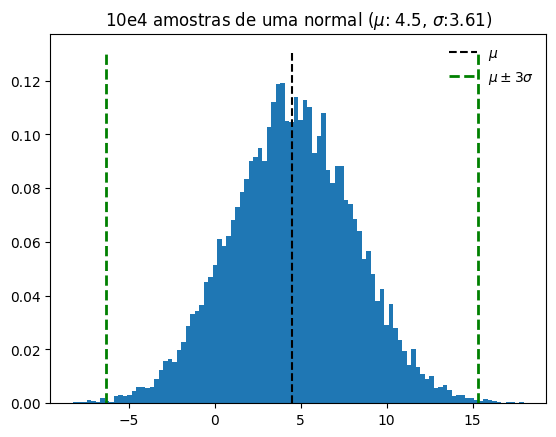

In [4]:
# O código abaixo gera 10**4 amostras de uma normal com a média 4.5 e desvio padrão sqrt(3) 
amostras_distribuicao_marginal_1=univariate_samples(mu=mu[0],std=covariance_matrix[0][0]**0.5,sample_size=10000)
sample_hist(amostras_distribuicao_marginal_1,mean=mu[0],std=covariance_matrix[0][0]**0.5)

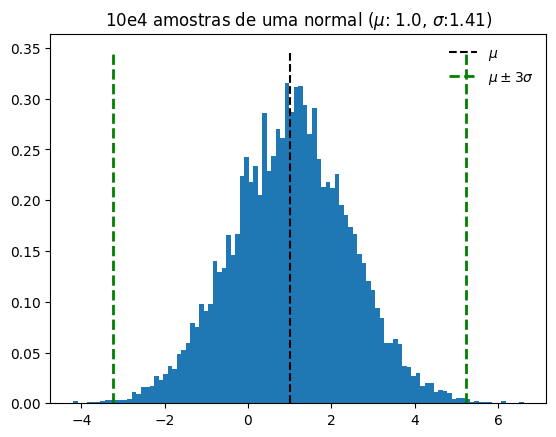

In [5]:
amostras_distribuicao_marginal_2=univariate_samples(mu=mu[1],std=covariance_matrix[1][1]**0.5,sample_size=10000)
sample_hist(amostras_distribuicao_marginal_2,mean=mu[1],std=covariance_matrix[1][1]**0.5)

In [6]:
bivariate_sample=bivariate_normal_samples(10**6,mu=mu,covariance_matrix=covariance_matrix)

Text(0.5, 1.0, 'Amostragem ideal 10e6 elementos')

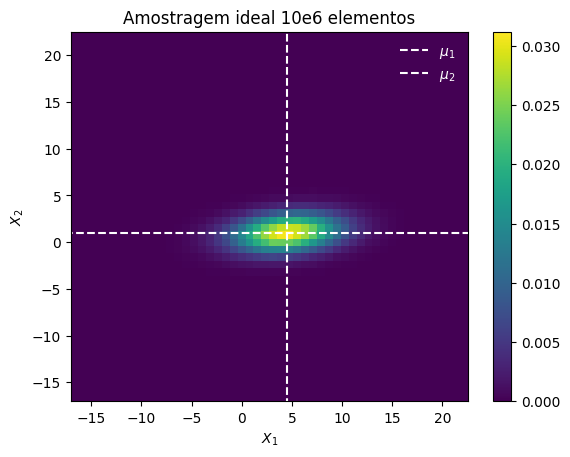

In [7]:
axismin=mu.min()-5*np.diagonal(covariance_matrix).max()**0.5
axismax=mu.max()+5*np.diagonal(covariance_matrix).max()**0.5
hist=plt.hist2d(*bivariate_sample,bins=50,density=True,range=[[axismin,axismax],[axismin,axismax]])
mean1=mu[0]
plt.vlines(mean1,hist[2].min()*1.1,hist[2].max()*1.1,color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min()*1.1,hist[1].max()*1.1,color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Amostragem ideal 10e6 elementos')

amostras_bivariadas=bivariate_normal_samples(10**6,mu=mu,covariance_matrix=covariance_matrix)

In [8]:
amostras_bivariadas_reais=bivariate_normal_samples(10**3,mu=mu,covariance_matrix=covariance_matrix)

Text(0.5, 1.0, 'Amostragem real 10e3 elementos')

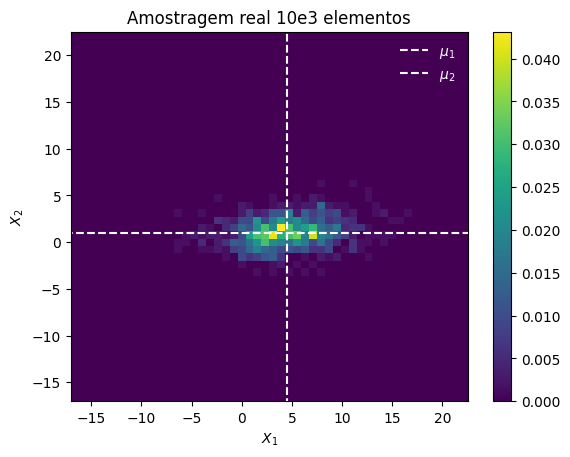

In [9]:
axismin=mu.min()-5*np.diagonal(covariance_matrix).max()**0.5
axismax=mu.max()+5*np.diagonal(covariance_matrix).max()**0.5
hist=plt.hist2d(*amostras_bivariadas_reais,bins=50,density=True,range=[[axismin,axismax],[axismin,axismax]])
mean1=mu[0]
plt.vlines(mean1,hist[2].min()*1.1,hist[2].max()*1.1,color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min()*1.1,hist[1].max()*1.1,color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Amostragem real 10e3 elementos')

## Item 2

Temos que por que os parâmetos que maximizam a verossimilhança são as médias amostral, e a variância amostral observadas na amostra, e a variância experiemetal encontradas nos dados obtidos.

De uma maneira matemática temos que:


$\hat{\mu}=\frac{1}{n}\sum_i^nX_i$

$\hat{\Sigma}=S_{n-1}$

In [10]:
def sum_of_log_likelihood(data,mean,covariance_matrix):
    return np.sum(np.log(sci.stats.multivariate_normal.pdf(data,mean,covariance_matrix,allow_singular=True)))

In [11]:
print(f'A soma do log da verossimilhança dos parâmetros ideias geradores da distribuição é {sum_of_log_likelihood(amostras_bivariadas_reais.T,mu,covariance_matrix)}')


A soma do log da verossimilhança dos parâmetros ideias geradores da distribuição é -4416.409730519988


In [12]:
number_of_realizations=10**5

gaussian_likelihood=np.empty((number_of_realizations,6))
for iteration in range(number_of_realizations):
    mean_temp=np.random.uniform(-10,10, 2)
    mean1=mean_temp[0]
    mean2=mean_temp[1]
    A = np.random.uniform(-5,5, (2,2))
    covariance_matrix_temp = A* A.T
    sigma_11=covariance_matrix_temp[0,0]
    sigma_21=covariance_matrix_temp[1,0]
    sigma_22=covariance_matrix_temp[1,1]
    mean_temp=np.array([mean1,mean2])
    try:
        gaussian_likelihood[iteration]=[mean1,mean2,sigma_11,sigma_22,sigma_21,sum_of_log_likelihood(amostras_bivariadas_reais.T,mean_temp,covariance_matrix_temp)]
    except:
        gaussian_likelihood[iteration]=[mean1,mean2,sigma_11,sigma_22,sigma_21,-10**4]

/tmp/ipykernel_42436/21214279.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sci.stats.multivariate_normal.pdf(data,mean,covariance_matrix,allow_singular=True)))


In [13]:
index_max_likelihood=np.argmax(gaussian_likelihood[:,-1])
print(f'A maior verossimilhança encontra-se no index {index_max_likelihood} do vetor\n')
print(f'o vetor média é igual a {gaussian_likelihood[index_max_likelihood,0:2]}')
sigma_11,sigma_22,sigma_21=gaussian_likelihood[index_max_likelihood][2:5]
print(f'a matriz de covariâncias é {[[round(sigma_11,1),round(sigma_21,1)],[round(sigma_21,1),round(sigma_22,1)]]}')
print(f'o valor da máxima verossimilhança encontrado foi {gaussian_likelihood[index_max_likelihood,-1]:.1f}')


A maior verossimilhança encontra-se no index 62464 do vetor

o vetor média é igual a [4.0442346  1.12126337]
a matriz de covariâncias é [[17.2, 1.8], [1.8, 2.3]]
o valor da máxima verossimilhança encontrado foi -4453.6


In [14]:
media_amostral=amostras_bivariadas_reais.mean(axis=1).round(1)
print(f'A média amostral é {media_amostral}')

A média amostral é [4.4 1. ]


In [15]:
media_amostral=amostras_bivariadas_reais.mean(axis=1).round(1)
print(f'A média amostral é {media_amostral}')
covariancia_amostral=np.cov(amostras_bivariadas_reais).round(1)
print(f'A covariância amostral é \n{covariancia_amostral}')

A média amostral é [4.4 1. ]
A covariância amostral é 
[[12.3  1. ]
 [ 1.   2. ]]


p

Text(0.5, 1.0, 'Verossimilhança em função das Médias')

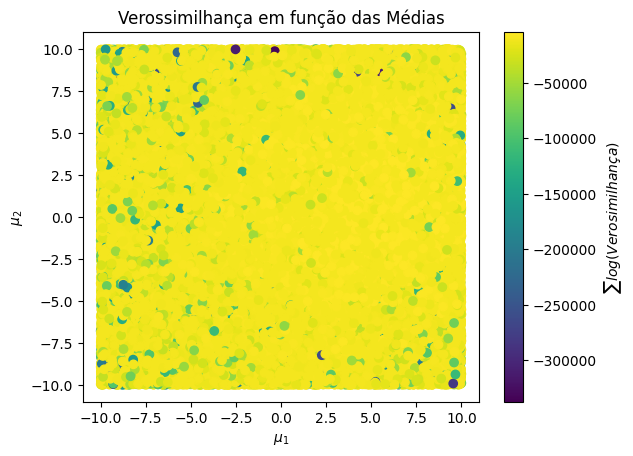

In [16]:
plt.scatter(gaussian_likelihood[:,0],gaussian_likelihood[:,1],c=gaussian_likelihood[:,-1])
plt.colorbar(label='$\sum log(Verosimilhança)$')
plt.xlabel('$\mu_1$')
plt.ylabel('$\mu_2$')
plt.title('Verossimilhança em função das Médias')

Text(0.5, 1.0, 'Verossimilhança em função das Variâncias')

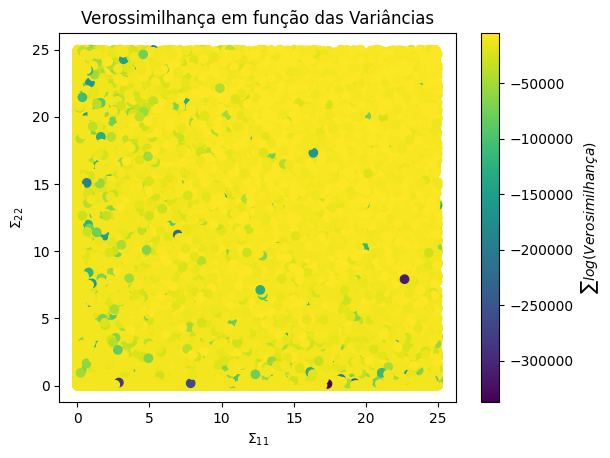

In [17]:
plt.scatter(gaussian_likelihood[:,2],gaussian_likelihood[:,3],c=gaussian_likelihood[:,-1])
plt.colorbar(label='$\sum log(Verosimilhança)$')
plt.xlabel('$\Sigma_{11}$')
plt.ylabel('$\Sigma_{22}$')
plt.title('Verossimilhança em função das Variâncias')

In [18]:
del gaussian_likelihood

## Item 3a

In [19]:
quantidade_amostras=10000
quantidade_observacoes=100

vetor_amostras_bivariadas=np.array([bivariate_normal_samples(quantidade_observacoes,mu=mu,covariance_matrix=covariance_matrix) for i in range(quantidade_amostras)])
vetor_medias_amostrais=vetor_amostras_bivariadas.mean(axis=2)


In [20]:
vetor_amostras_bivariadas.shape

(10000, 2, 100)

In [21]:
def plot_kurtosis_and_skewness(array,hist):
    curtose=sci.stats.kurtosis(array)
    assimetria=sci.stats.skew(array)
    plt.text(hist[1].min()*1,hist[0].max()*1.,f'Kurtosis:{curtose:.2f}\nSkewness:{assimetria:.2f}')
    

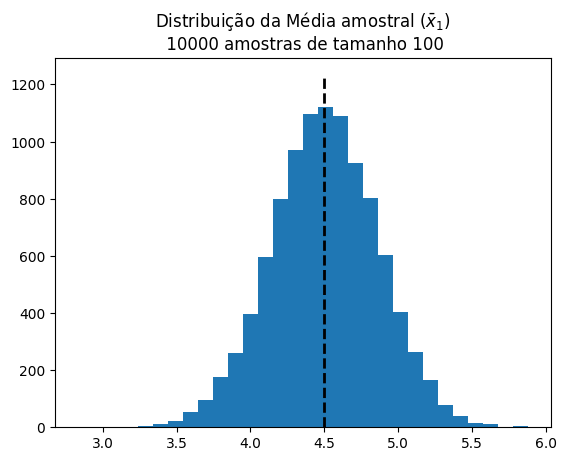

In [22]:
hist=plt.hist(vetor_medias_amostrais[:,0],bins=30)
plt.title(r'Distribuição da Média amostral ($\bar{x}_1$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
plt.vlines(mu[0],0,hist[0].max()*1.1,label='$\mu_1$',color='black',linestyles='dashed',linewidth=2)

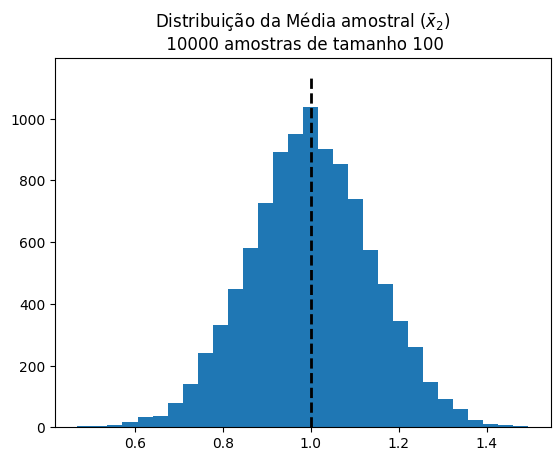

In [23]:
plt.title(r'Distribuição da Média amostral ($\bar{x}_2$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
hist=plt.hist(vetor_medias_amostrais[:,1],bins=30)
plt.vlines(mu[1],0,hist[0].max()*1.1,label='$\mu_2$',color='black',linestyles='dashed',linewidth=2)

Text(0.5, 1.0, 'Distribuiçã da Média amostral ($\\bar{X}$)\n 10000 amostras de tamanho 100')

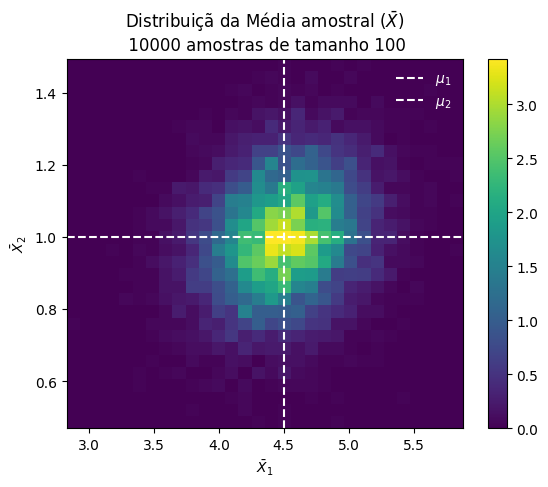

In [24]:

hist=plt.hist2d(*vetor_medias_amostrais.T,bins=30,density=True)
mean1=mu[0]
plt.vlines(mean1,hist[2].min(),hist[2].max(),color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min(),hist[1].max(),color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')
plt.title(r'Distribuiçã da Média amostral ($\bar{X}$)'+f'\n {quantidade_amostras} amostras com {quantidade_observacoes} realizações')


### Teste de Normalidade 
#### temos que a distribuição da média de uma amostra aleatória gerada a partir de uma normal tem que ser dada por uma normal. Sendo assim, iremos usar o teste de kolmogorov smirnov para ratificar a normalidade, uma vez que empiricamente já conseguimos detectar o comportamento normal.

## Item 3b

In [25]:
vetor_covariancias_amostrais=np.array([np.cov(amostra) for amostra in vetor_amostras_bivariadas])
vetor_determinante_covariancias_amostrais=np.array([np.linalg.det(cov)  for cov in vetor_covariancias_amostrais])
vetor_covariancias_amostrais=vetor_covariancias_amostrais.reshape(-1,4,)
vetor_covariancias_amostrais.shape


(10000, 4)

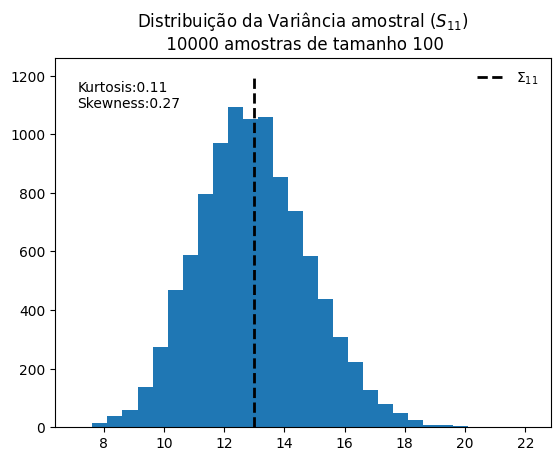

In [26]:
hist=plt.hist(vetor_covariancias_amostrais[:,0],bins=30)
plt.title(r'Distribuição da Variância amostral ($S_{11}$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
plt.vlines(covariance_matrix[0,0],0,hist[0].max()*1.1,label='$\Sigma_{11}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,0],hist)
plt.legend(frameon=False)

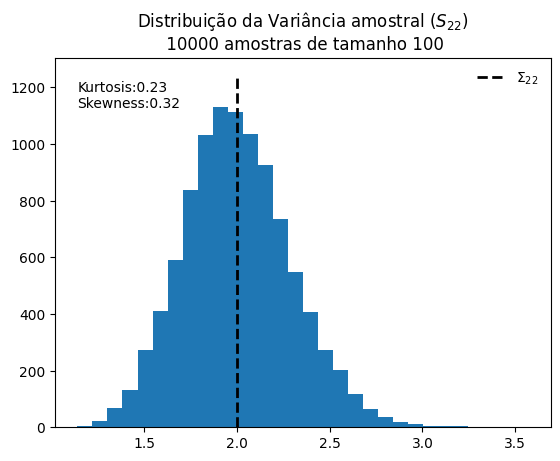

In [27]:
hist=plt.hist(vetor_covariancias_amostrais[:,-1],bins=30)
plt.title(r'Distribuição da Variância amostral ($S_{22}$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
plt.vlines(covariance_matrix[1,1],0,hist[0].max()*1.1,label='$\Sigma_{22}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,-1],hist)
plt.legend(frameon=False)

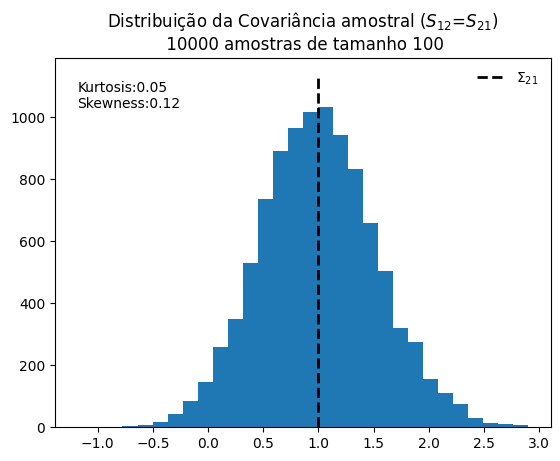

In [28]:
hist=plt.hist(vetor_covariancias_amostrais[:,1],bins=30)
plt.title(r'Distribuição da Covariância amostral ($S_{12}$=$S_{21}$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
plt.vlines(covariance_matrix[0,1],0,hist[0].max()*1.1,label='$\Sigma_{21}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,1],hist)
plt.legend(frameon=False)

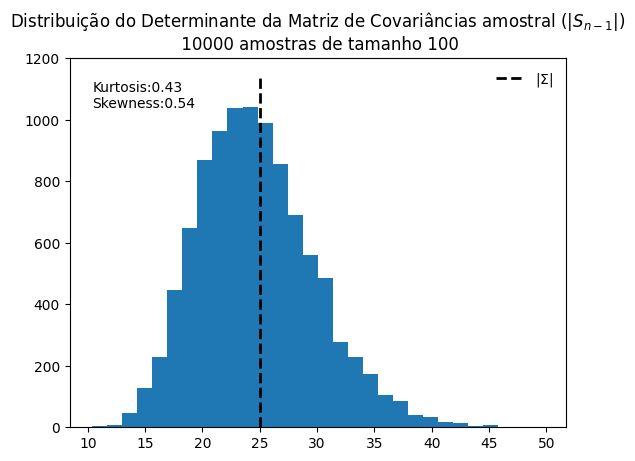

In [29]:
hist=plt.hist(vetor_determinante_covariancias_amostrais,bins=30)
plt.title(r'Distribuição do Determinante da Matriz de Covariâncias amostral ($|S_{n-1}|$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')
plt.vlines(np.linalg.det(covariance_matrix),0,hist[0].max()*1.1,label='$|\Sigma|$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_determinante_covariancias_amostrais,hist)

plt.legend(frameon=False)

## Item 3c

In [30]:
def confidence_region_parameter(x,p,m):
    scale=p*(m-1)/(m-p)
    F=sci.stats.f.ppf(1-x,p,m-p)
    return scale*F

def distance(X_mean,mu,inverse_covariance_matrix,n):
   
   """
    1xn x 2x2 x nx1
    1xn x nx1
    1x1
    """
   
   return n*float(np.matmul((X_mean-mu).reshape(1,2),np.matmul(inverse_covariance_matrix.reshape(2,2),(X_mean-mu).reshape(2,1))))



In [31]:
inverse_covariance_matrix=np.linalg.inv(covariance_matrix)
mu_h0=vetor_medias_amostrais.mean(axis=0)
threshold=confidence_region_parameter(0.10,2,quantidade_observacoes)
X1=np.linspace(mu_h0[0]*0.1,mu_h0[0]*1.9,500)
X2=np.linspace(mu_h0[1]*0.1,mu_h0[1]*1.9,500)
X1,X2=np.meshgrid(X1,X2)
confidence_region=np.zeros(X1.shape)
print(threshold)



for i1 in range(X1.shape[0]):
    for i2 in range(X2.shape[0]):
        x1=X1[i1,i2]
        x2=X2[i1,i2]
        calculated_distance=distance([x1,x2],mu_h0,inverse_covariance_matrix,quantidade_observacoes)
        if calculated_distance<threshold:

            confidence_region[i1,i2]=1




4.7632002813139005


/tmp/ipykernel_42436/4075707600.py:1: UserWarning: The following kwargs were not used by contour: 'label'
  contour=plt.contour(X1[100:-100,100:-100],X2[100:-100,100:-100],confidence_region[100:-100,100:-100],colors='red',label='Região de Confiança')


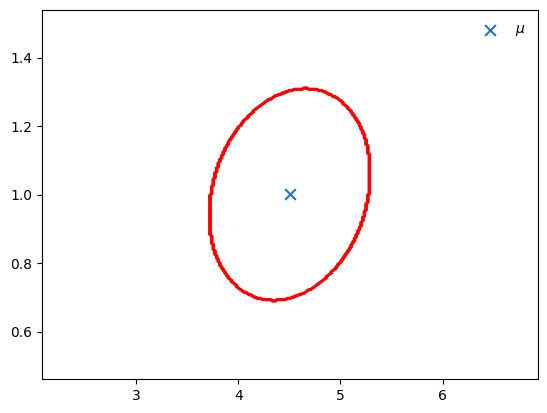

In [33]:

contour=plt.contour(X1[100:-100,100:-100],X2[100:-100,100:-100],confidence_region[100:-100,100:-100],colors='red',label='Região de Confiança')
plt.scatter(mu_h0[0],mu_h0[1],marker='x',s=60,label='$\mu$')
plt.legend(frameon=False)


/tmp/ipykernel_42436/1234090981.py:12: UserWarning: The following kwargs were not used by contour: 'label'
  contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')


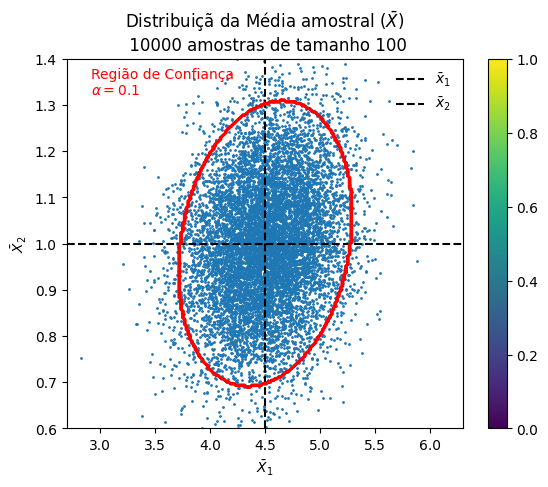

## Item 3c i)

In [98]:
def simultaneos_intervals(alpha,n,p,direction,mean,covariance_matrix):
    """
    n: degres of freedom
    p: dimension
    """
    if isinstance(direction,list):
        direction=np.array(direction)
    if isinstance(covariance_matrix,list):
        covariance_matrix=np.array(covariance_matrix)
    if isinstance(mean,list):
        mean=np.array(mean) 

    mean=np.dot(direction,mean)
    scale=float(np.matmul(direction.reshape(1,p),np.matmul(covariance_matrix.reshape(p,p),direction.reshape(p,1))))**.5/n**0.5
    F_scale=p*(n-1)/(n-p)
    F=sci.stats.f.ppf(1-alpha,p,n-p)
    xmin=mean-scale*(F*F_scale)**0.5
    xmax=mean+scale*(F*F_scale)**0.5

    return xmin,xmax

In [112]:
x1_simultaneos_intervals=simultaneos_intervals(0.1,quantidade_amostras,2,[1,0],mu_h0,covariance_matrix)
x2_simultaneos_intervals=simultaneos_intervals(0.1,quantidade_amostras,2,[0,1],mu_h0,covariance_matrix)
print(x1_simultaneos_intervals,x2_simultaneos_intervals)

(4.42544924729417, 4.580222619068333) (0.9699215441855719, 1.03062865517488)


/tmp/ipykernel_42436/1527246593.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')


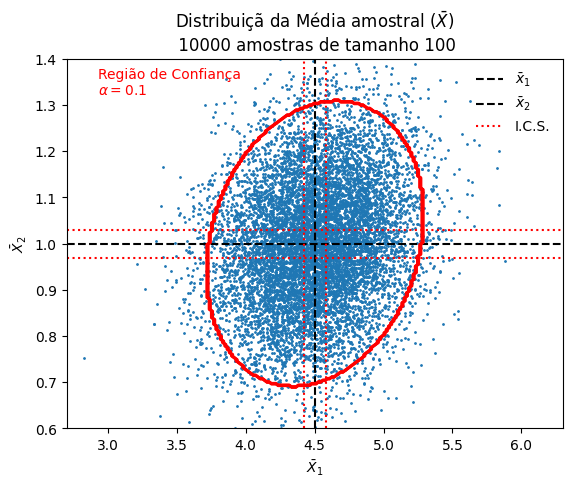

In [113]:

plt.scatter(*vetor_medias_amostrais.T,s=1)
mean1=mu[0]
mean2=mu[1]
plt.vlines(mean1,mean2*0.6,mean2*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_1$')
plt.hlines(mean2,mean1*0.6,mean1*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_2$')
plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')
plt.title(r'Distribuiçã da Média amostral ($\bar{X}$)'+f'\n {quantidade_amostras} amostras com {quantidade_observacoes} realizações')


contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')
plt.text(mean1*0.65,mean2*1.35,'Região de Confiança\n'+r'$\alpha=0.1$',va='center',color='red')
plt.xlim(mean1*0.6,mean1*1.4)
plt.ylim(mean2*0.6,mean2*1.4)

##simultaneos confidence  intervals
plt.vlines(x1_simultaneos_intervals,mean2*0.6,mean2*1.4,color='red',linestyles='dotted')

plt.hlines(x2_simultaneos_intervals,mean1*0.6,mean1*1.4,color='red',linestyles='dotted',label='I.C.S.')



plt.legend(frameon=False,labelcolor='black',loc=1)




## item 3c ii)

In [114]:
def bonferari(alpha,n,p,mean,variance):
    """
    n: degres of freedom
    p: 
    """
    scale=(variance/n)**.5
    t_student=sci.stats.t.ppf(1-(alpha/(2*p)),n-1)
    xmin=mean-scale*t_student
    xmax=mean+scale*t_student

    return xmin,xmax

In [118]:
x1_bonferari_intervals=bonferari(0.1,quantidade_amostras,2,mu_h0[0],covariance_matrix[0,0])
x2_bonferari_intervals=bonferari(0.1,quantidade_amostras,2,mu_h0[1],covariance_matrix[1,1])
print(x1_bonferari_intervals,x2_bonferari_intervals)

(4.43215987151909, 4.573511994843413) (0.9725536675602838, 1.0279965318001678)


/tmp/ipykernel_42436/1820828942.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')


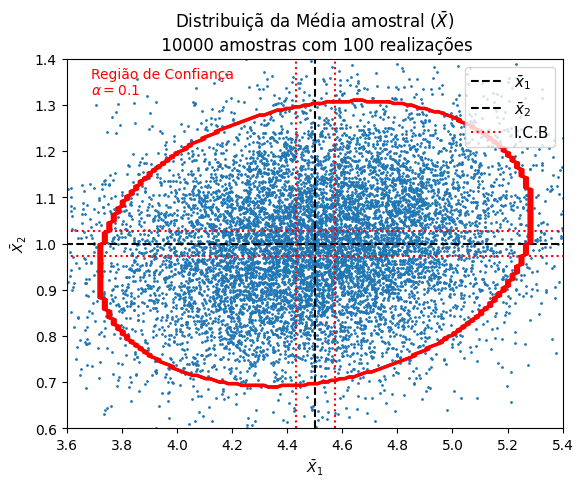

In [150]:

plt.scatter(*vetor_medias_amostrais.T,s=1)
mean1=mu[0]
mean2=mu[1]
plt.vlines(mean1,mean2*0.6,mean2*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_1$')
plt.hlines(mean2,mean1*0.6,mean1*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_2$')
plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')
plt.title(r'Distribuiçã da Média amostral ($\bar{X}$)'+f'\n {quantidade_amostras} amostras com {quantidade_observacoes} realizações')


contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')
plt.text(mean1*0.82,mean2*1.35,'Região de Confiança\n'+r'$\alpha=0.1$',va='center',color='red')
plt.xlim(mean1*0.8,mean1*1.2)
plt.ylim(mean2*0.6,mean2*1.4)

##bonferari confidence  intervals
plt.vlines(x1_bonferari_intervals,mean2*0.6,mean2*1.4,color='red',linestyles='dotted')

plt.hlines(x2_bonferari_intervals,mean1*0.6,mean1*1.4,color='red',linestyles='dotted',label='I.C.B')



plt.legend(frameon=True,labelcolor='black',loc=1,fontsize=11)




## Bonferari vs Intervalos simultanes

/tmp/ipykernel_42436/4251836744.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')


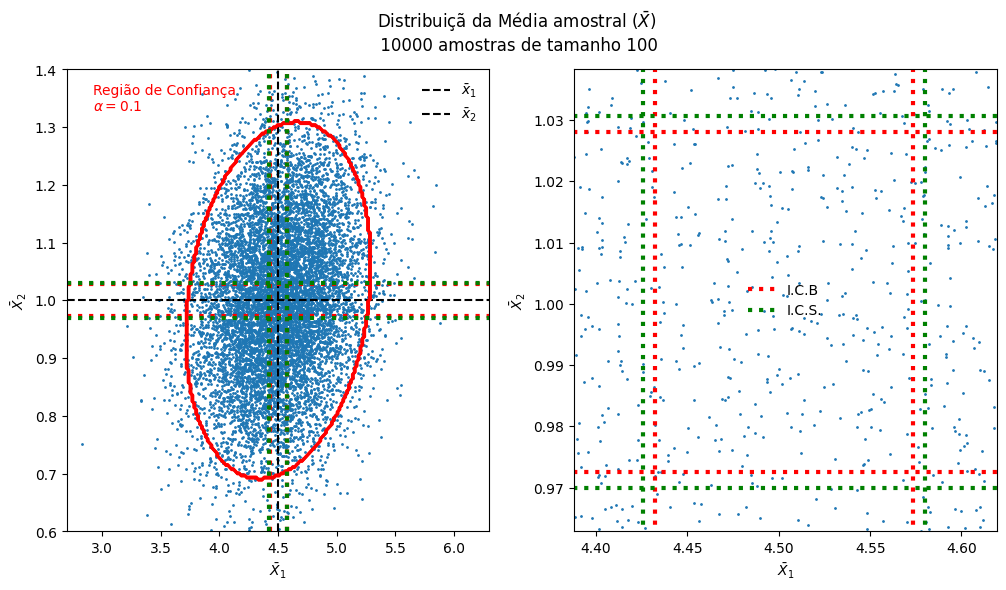

In [137]:
plt.figure(figsize=(12,6))

plt.suptitle(r'Distribuiçã da Média amostral ($\bar{X}$)'+f'\n {quantidade_amostras} amostras de tamanho {quantidade_observacoes}')

plt.subplot(121)
plt.scatter(*vetor_medias_amostrais.T,s=1)
mean1=mu[0]
mean2=mu[1]
plt.vlines(mean1,mean2*0.6,mean2*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_1$')
plt.hlines(mean2,mean1*0.6,mean1*1.4,color='black',linestyle='dashed',label=r'$\bar{x}_2$')
plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')


contour=plt.contour(X1,X2,confidence_region,colors='red',label='Região de Confiança')
plt.text(mean1*0.65,mean2*1.35,'Região de Confiança\n'+r'$\alpha=0.1$',va='center',color='red')
plt.xlim(mean1*0.6,mean1*1.4)
plt.ylim(mean2*0.6,mean2*1.4)
plt.legend(frameon=False,labelcolor='black',loc=1)

plt.vlines(x1_bonferari_intervals,mean2*0.6,mean2*1.4,color='red',linestyles='dotted',linewidth=3)

plt.hlines(x2_bonferari_intervals,mean1*0.6,mean1*1.4,color='red',linestyles='dotted',label='I.C.B',linewidth=3)
##simultaneos confidence  intervals
plt.vlines(x1_simultaneos_intervals,mean2*0.6,mean2*1.4,color='green',linestyles='dotted',linewidth=3)

plt.hlines(x2_simultaneos_intervals,mean1*0.6,mean1*1.4,color='green',linestyles='dotted',label='I.C.S.',linewidth=3)


plt.subplot(122)
plt.scatter(*vetor_medias_amostrais.T,s=1)

##bonferari confidence  intervals
plt.vlines(x1_bonferari_intervals,mean2*0.6,mean2*1.4,color='red',linestyles='dotted',linewidth=3)

plt.hlines(x2_bonferari_intervals,mean1*0.6,mean1*1.4,color='red',linestyles='dotted',label='I.C.B',linewidth=3)
##simultaneos confidence  intervals
plt.vlines(x1_simultaneos_intervals,mean2*0.6,mean2*1.4,color='green',linestyles='dotted',linewidth=3)

plt.hlines(x2_simultaneos_intervals,mean1*0.6,mean1*1.4,color='green',linestyles='dotted',label='I.C.S.',linewidth=3)

plt.xlim(x1_bonferari_intervals[0]*0.99,x1_bonferari_intervals[1]*1.01)
plt.ylim(x2_bonferari_intervals[0]*0.99,x2_bonferari_intervals[1]*1.01)

plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')

plt.legend(frameon=False,labelcolor='black',loc='center')


